In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
housing = pd.read_csv("Melbourne_housing_FULL.csv")

# Context and description of the data

1. Background information on the subject and field of study

2. Information about data collection:

    a. Who collected the data
    
    b. When the data was collected
    
    c. How the data was collected
    
    d. Any implications this may have on analysis

1. Background information on the subject and field of study.

The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy.

In [4]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 2. Information about data collection:

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

# Exploratory Analysis of the Data

1.Summary statistics and the distributional shape of variables in the data

2.Unusual features or outliers present in the data

3.Potential relationships that may exist in the data, including, but not limited to:
   
    a. two-way tables and side-by-side bar charts for relationships between categorical data
    
    b. scatter plots for relationships between numeric data
    
    c. side-by-side histograms or boxplots for relationships between numeric and categorical data

4.Findings should be reported with readable tables or clearly labeled graphs.

5.There must also be text to explain the findings and the included tables.

In [6]:
# 1.Summary statistics and the distributional shape of variables in the data
housing.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [7]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
df = housing.loc[((housing['Rooms'].isnull() == False) & 
             (housing['Price'].isnull() == False) & 
             (housing['Distance'].isnull() == False) & 
             (housing['Bedroom2'].isnull() == False) & 
             (housing['Bathroom'].isnull() == False) & 
             (housing['Car'].isnull() == False) & 
             (housing['BuildingArea'].isnull() == False) &
             (housing['Rooms'].isnull() == False)& 
             (housing['YearBuilt'].isnull() == False))]


In [12]:
df= df[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 
         'Method','Distance', 'Bedroom2', 'Bathroom', 
         'Car', 'CouncilArea','Regionname']]

In [35]:
df["RangeofDistance"] =pd.cut(df.Distance,bins=np.arange(0,60,10),right=False)

#cant make the thing I want.....
##From below, easily see that the most close to the Business Center.....
print(df.groupby('RangeofDistance')['Price'].unique())

#From below can see that as the distance far from Business Center, 
#the number of rooms,bedroom and Bathrooms would increase.
#Which mean that if you be want to buy a hourse to invest like for rent the house out,
#that is not a good choice for some big family.
print(df.groupby('RangeofDistance')['Rooms'].mean())
print(df.groupby('RangeofDistance')['Bedroom2'].mean())
df.groupby('RangeofDistance')['Bathroom'].mean()

RangeofDistance
[0, 10)     [1035000.0, 1465000.0, 1600000.0, 1876000.0, 1...
[10, 20)    [840000.0, 730000.0, 770000.0, 603000.0, 70000...
[20, 30)    [640000.0, 665000.0, 515500.0, 660000.0, 93200...
[30, 40)    [611000.0, 755000.0, 320000.0, 480000.0, 57200...
[40, 50)    [521000.0, 650000.0, 540000.0, 817000.0, 77500...
Name: Price, dtype: object
RangeofDistance
[0, 10)     2.852990
[10, 20)    3.306769
[20, 30)    3.489796
[30, 40)    3.429658
[40, 50)    3.657143
Name: Rooms, dtype: float64
RangeofDistance
[0, 10)     2.826014
[10, 20)    3.293567
[20, 30)    3.488595
[30, 40)    3.422053
[40, 50)    3.657143
Name: Bedroom2, dtype: float64


RangeofDistance
[0, 10)     1.565036
[10, 20)    1.719635
[20, 30)    1.849940
[30, 40)    1.722433
[40, 50)    1.914286
Name: Bathroom, dtype: float64

In [14]:
##TRY
print(housing.groupby('Type')['Rooms'].count())
print(housing.groupby('Type')['Car'].mean())

Type
h    23980
t     3580
u     7297
Name: Rooms, dtype: int64
Type
h    1.866697
t    1.602782
u    1.140742
Name: Car, dtype: float64


### 2.Unusual features or outliers present in the data

In [15]:
housing.select_dtypes(['category']).columns
#There is no any category in this original data cannot make bar charts.

Index([], dtype='object')

In [16]:
df.select_dtypes(['category']).columns
#after I make a new column, have 1.

Index(['RangeofDistance'], dtype='object')

In [17]:
housing.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10079 entries, 2 to 34856
Data columns (total 13 columns):
Suburb             10079 non-null object
Address            10079 non-null object
Rooms              10079 non-null int64
Type               10079 non-null object
Price              10079 non-null float64
Method             10079 non-null object
Distance           10079 non-null float64
Bedroom2           10079 non-null float64
Bathroom           10079 non-null float64
Car                10079 non-null float64
CouncilArea        10079 non-null object
Regionname         10079 non-null object
RangeofDistance    10079 non-null category
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 1.3+ MB


,Suburb,Address,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,CouncilArea,Regionname,RangeofDistance
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2.5,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,"[0, 10)"
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,Yarra City Council,Northern Metropolitan,"[0, 10)"
6,Abbotsford,55a Park St,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,Yarra City Council,Northern Metropolitan,"[0, 10)"
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,2.5,4.0,2.0,0.0,Yarra City Council,Northern Metropolitan,"[0, 10)"
14,Abbotsford,98 Charles St,2,h,1636000.0,S,2.5,2.0,1.0,2.0,Yarra City Council,Northern Metropolitan,"[0, 10)"


### 3.Potential relationships that may exist in the data, including, but not limited to:

In [25]:
#two-way tables and side-by-side bar charts for relationships between categorical data
#Since there is no categorical variables in this data, I will Change some variables into category:
df['Type'] = df['Type'].astype('category') 
df['CouncilArea'] = df['CouncilArea'].astype('category') 
df['Suburb'] = df['Suburb'].astype('category')
df['Regionname'] = df['Regionname'].astype('category')

In [26]:
df.select_dtypes(['category']).columns

Index(['Suburb', 'Type', 'CouncilArea', 'Regionname', 'RangeofDistance'], dtype='object')

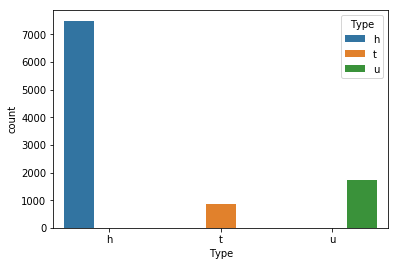

In [30]:
#h mean h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse
#We can see in this data, house,cottage,villa are majority in type.
sns.countplot(data = df, hue = 'Type',x = 'Type')

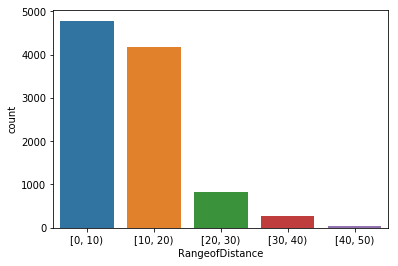

In [29]:
#In this plot, we can see that Most of the houses/Apartment 
#are concentrated in less than 10km from CBD("Central Business District ")
sns.countplot(data = df, x = 'RangeofDistance')

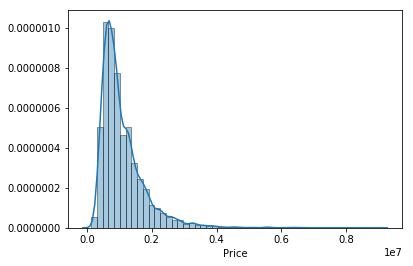

In [65]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"))

In [33]:
#scatter plots for relationships between numeric data
df.select_dtypes(['float64']).columns

Index(['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car'], dtype='object')

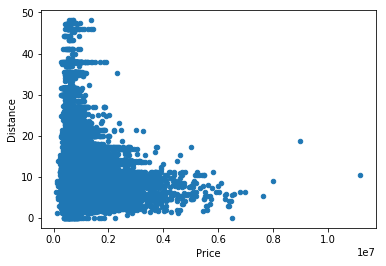

In [70]:
plt.figure(figsize=(16,7))
housing.plot.scatter(x='Price', y='Distance')

In [62]:
w = np.random.randint(0,3,100)
colors = np.array(['y','m','c'])
c = colors[w]
z = 100 * np.random.randint(0,10,100)

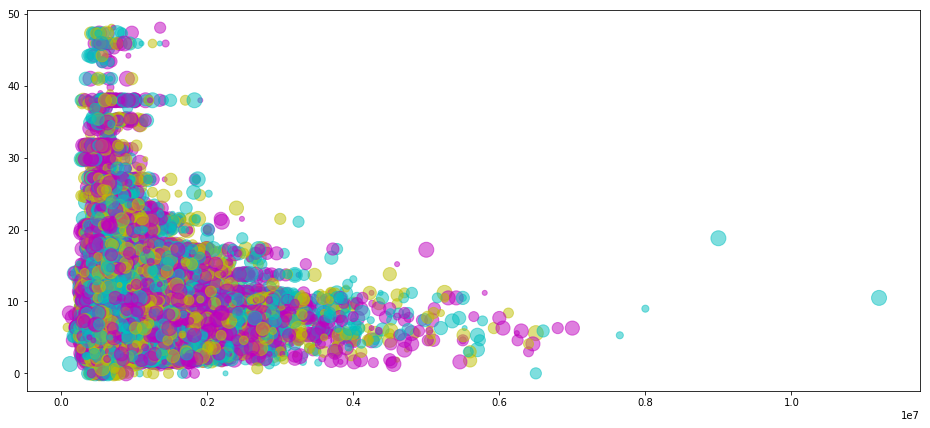

In [69]:
plt.figure(figsize=(16,7))
plt.scatter(x=housing['Price'] ,y=housing['Distance'] , s=z, c = c,marker = ".", alpha = 0.5) 
plt.show()

In [ ]:
#side-by-side histograms or boxplots for relationships between numeric and categorical data

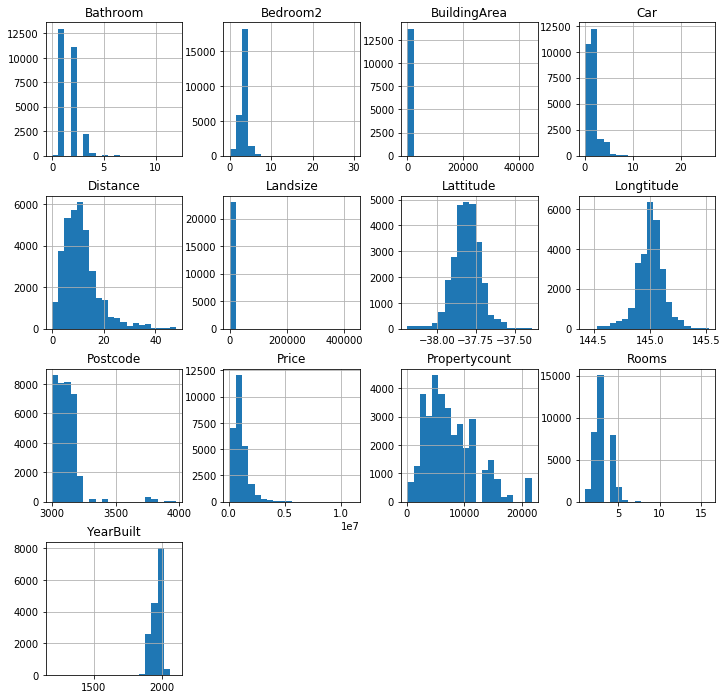

In [76]:
##TRY
housing.hist(bins=20, figsize=(12,12))
plt.show()

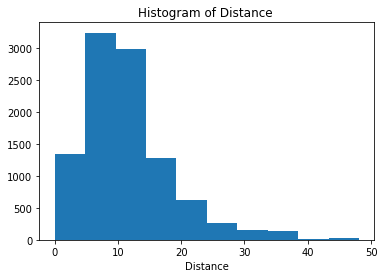

In [81]:
#We can see mostly house's distance would in the range of 5-15 km.
plt.hist(df.Distance)
plt.title("Histogram of Distance")
plt.xlabel("Distance")
plt.show()

### 4.Findings should be reported with readable tables or clearly labeled graphs

In [ ]:
#Already commented 

### 5.There must also be text to explain the findings and the included tables.

In [ ]:
#Done

## Data Modeling

In [83]:
##TRY
